In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import PIL
%matplotlib inline

In [20]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off')
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

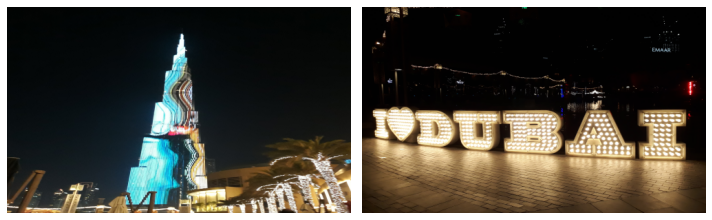

In [102]:
img = cv.imread("img/img_1.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_2 = cv.imread("img/img_2.jpg")
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)

dim = (500, 300)
# resize image
img = cv.resize(img, dim, interpolation = cv.INTER_AREA)
img_2 = cv.resize(img_2, dim, interpolation = cv.INTER_AREA)

show_img_compar(img, img_2)

### Method 1 - Using the Average

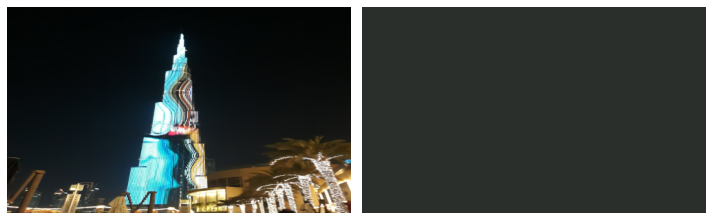

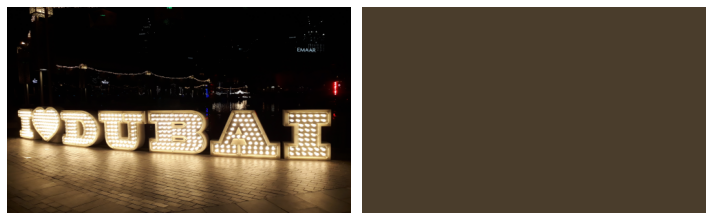

In [103]:
img_temp = img.copy()
img_temp[:,:,0], img_temp[:,:,1], img_temp[:,:,2] = np.average(img, axis=(0,1))

img_temp_2 = img_2.copy()
img_temp_2[:,:,0], img_temp_2[:,:,1], img_temp_2[:,:,2] = np.average(img_2, axis=(0,1))

show_img_compar(img, img_temp)
show_img_compar(img_2, img_temp_2)

### Method 2 - Most common combination

In [104]:
print(img.reshape(-1, 3).shape)
img.reshape(-1, 3)

(150000, 3)


array([[  4,   6,   5],
       [  3,   4,   3],
       [  2,   4,   3],
       ...,
       [103,  77,  68],
       [ 83,  49,  41],
       [ 68,  30,  22]], dtype=uint8)

In [105]:
print(img.shape)
img

(300, 500, 3)


array([[[  4,   6,   5],
        [  3,   4,   3],
        [  2,   4,   3],
        ...,
        [  4,   6,   5],
        [  3,   5,   4],
        [  4,   6,   5]],

       [[  2,   4,   3],
        [  4,   5,   4],
        [  2,   4,   3],
        ...,
        [  4,   6,   5],
        [  4,   6,   5],
        [  2,   4,   3]],

       [[  4,   6,   5],
        [  2,   4,   3],
        [  2,   4,   3],
        ...,
        [  3,   5,   4],
        [  4,   6,   5],
        [  4,   6,   5]],

       ...,

       [[191, 153,  79],
        [195, 159,  86],
        [196, 161,  87],
        ...,
        [ 90,  56,  43],
        [ 71,  32,  22],
        [ 70,  27,  18]],

       [[177, 139,  73],
        [179, 141,  76],
        [180, 143,  78],
        ...,
        [ 96,  67,  56],
        [ 75,  38,  30],
        [ 69,  27,  20]],

       [[124,  88,  53],
        [120,  85,  53],
        [120,  87,  56],
        ...,
        [103,  77,  68],
        [ 83,  49,  41],
        [ 68,  30,  22]]

In [106]:
unique, counts = np.unique(img.reshape(-1, 3), axis=0, return_counts=True)
print(unique)
print(counts)

[[  0   4   5]
 [  1   3   2]
 [  1   3   3]
 ...
 [255 255 251]
 [255 255 252]
 [255 255 253]]
[ 2 26 12 ... 17  3  1]


In [107]:
np.argmax(counts), np.max(counts), np.sum(counts)

(164, 4444, 150000)

In [108]:
unique[np.argmax(counts)]

array([4, 8, 9], dtype=uint8)

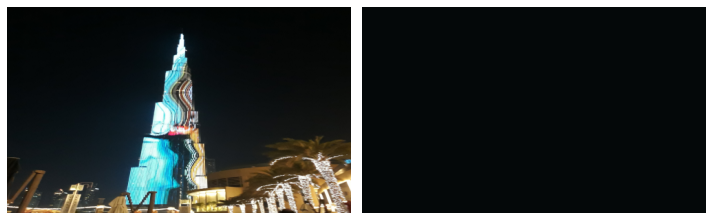

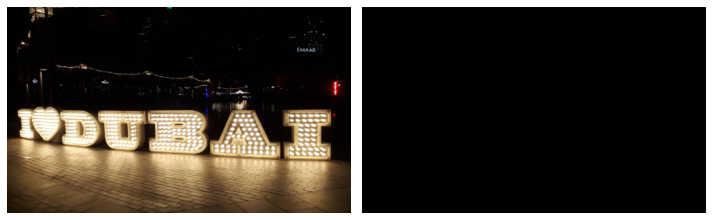

In [109]:
img_temp = img.copy()
unique, counts = np.unique(img_temp.reshape(-1, 3), axis=0, return_counts=True)
img_temp[:,:,0], img_temp[:,:,1], img_temp[:,:,2] = unique[np.argmax(counts)]

img_temp_2 = img_2.copy()
unique, counts = np.unique(img_temp_2.reshape(-1, 3), axis=0, return_counts=True)
img_temp_2[:,:,0], img_temp_2[:,:,1], img_temp_2[:,:,2] = unique[np.argmax(counts)]

show_img_compar(img, img_temp)
show_img_compar(img_2, img_temp_2)

### Method 3 - N  most common color

In [110]:
from sklearn.cluster import KMeans

In [111]:
clt = KMeans(n_clusters=5)
clt.fit(img.reshape(-1, 3))

KMeans(n_clusters=5)

In [112]:
clt.labels_

array([2, 2, 2, ..., 4, 4, 4], dtype=int32)

In [113]:
clt.cluster_centers_

array([[161.67933849, 135.45629296,  95.83011168],
       [215.32807672, 229.1328716 , 215.31262653],
       [  9.79591562,  14.61608403,  16.25269555],
       [ 77.64418605, 202.38435518, 216.64820296],
       [ 62.14054416,  56.46074933,  44.43862623]])

In [114]:
def palette(clusters):
    width=300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

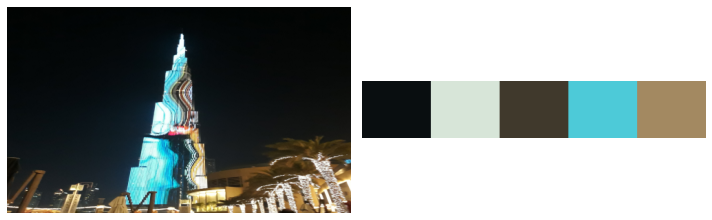

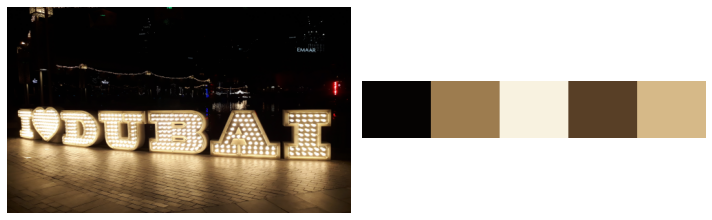

In [115]:
clt_1 = clt.fit(img.reshape(-1, 3))
show_img_compar(img, palette(clt_1))

clt_2 = clt.fit(img_2.reshape(-1, 3))
show_img_compar(img_2, palette(clt_2))

K-means with K=5 for the second image seems to be too much. Trying only three gives better results.

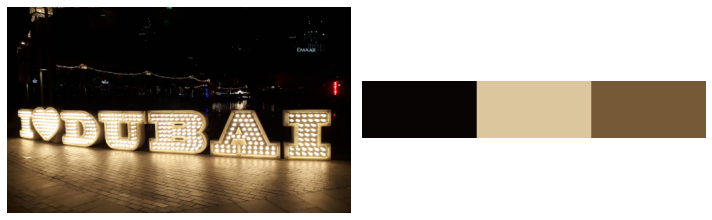

In [116]:
def palette(clusters):
    width=300
    palette = np.zeros((50, width, 3), np.uint8)
    steps = width/clusters.cluster_centers_.shape[0]
    for idx, centers in enumerate(clusters.cluster_centers_): 
        palette[:, int(idx*steps):(int((idx+1)*steps)), :] = centers
    return palette

clt_3 = KMeans(n_clusters=3)
clt_3.fit(img_2.reshape(-1, 3))
show_img_compar(img_2, palette(clt_3))

### Method 3.1 - N  most common color plus %

In [117]:
from collections import Counter

def palette_perc(k_cluster):
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)
    
    n_pixels = len(k_cluster.labels_)
    counter = Counter(k_cluster.labels_) # count how many pixels per cluster
    perc = {}
    for i in counter:
        perc[i] = np.round(counter[i]/n_pixels, 2)
    perc = dict(sorted(perc.items()))
    
    #for logging purposes
    print(perc)
    print(k_cluster.cluster_centers_)
    
    step = 0
    
    for idx, centers in enumerate(k_cluster.cluster_centers_): 
        palette[:, step:int(step + perc[idx]*width+1), :] = centers
        step += int(perc[idx]*width+1)
        
    return palette

{0: 0.06, 1: 0.7, 2: 0.06, 3: 0.03, 4: 0.15}
[[215.3978862  229.19045586 215.3758941 ]
 [  9.82098854  14.64719306  16.28734839]
 [161.8879802  135.66889056  96.01452706]
 [ 77.72521666 202.49630099 216.74867893]
 [ 62.43071614  56.64520032  44.50524334]]


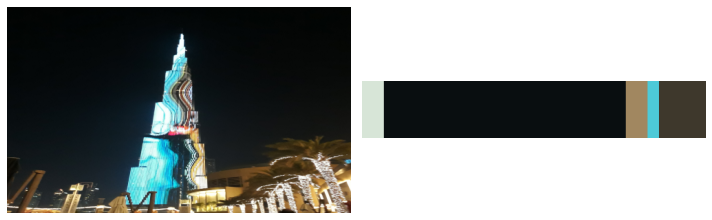

{0: 0.55, 1: 0.11, 2: 0.12, 3: 0.17, 4: 0.05}
[[  5.43504185   3.05765777   2.40138066]
 [214.49707638 185.38634035 136.69799265]
 [156.93787014 123.821094    79.43275546]
 [ 88.0083687   63.59549932  38.60298711]
 [248.87702669 242.8313794  225.74594662]]


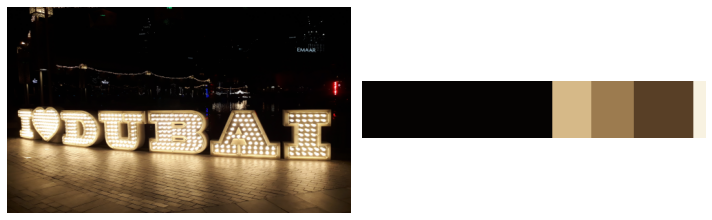

In [118]:
clt_1 = clt.fit(img.reshape(-1, 3))
show_img_compar(img, palette_perc(clt_1))

clt_2 = clt.fit(img_2.reshape(-1, 3))
show_img_compar(img_2, palette_perc(clt_2))

### What if we used k=1 for the second image

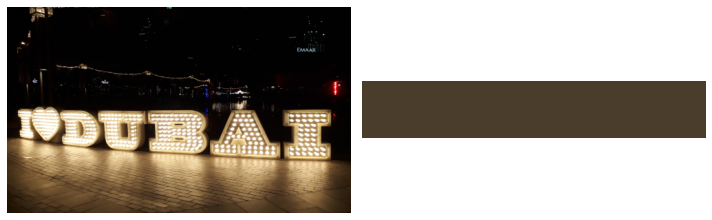

In [119]:
clt_1 = KMeans(n_clusters=1)
clt_1.fit(img_2.reshape(-1, 3))
show_img_compar(img_2, palette(clt_1))

Answer: We'll get the same results as the average method